In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from DA import Import

In [25]:
n = 25
a = 3
alpha = 0.05

In [26]:
df = pd.read_excel("data_raket.xlsx")

In [27]:
df = df.rename(columns={"test":"test", "doel snelheid (in knopen)":"doel", "resultaat (0=mis 1=raak)":"resultaat"}).copy()

In [28]:
df = df.drop(columns="test").copy()

# Dataset analyseren

# Vraag: Is de doelsnelheid de snelheid van de raket of de snelheid van het doel dat geraakt dient te worden?

In [29]:
df.describe()

,doel,resultaat
count,25.000000,25.000000
mean,338.800000,0.520000
std,112.187343,0.509902
min,200.000000,0.000000
25%,230.000000,0.000000
50%,310.000000,1.000000
75%,460.000000,1.000000
max,500.000000,1.000000


In [30]:
df['resultaat'].value_counts()

1    13
0    12
Name: resultaat, dtype: int64

- kolomen zijn int65 types
- 25 metingen uitgevoerd
- gemiddelde snelheid was 338.8 knopen (1 knoop = 1.852 km/h)
- gemiddelde 52% was raak
- 12 mis, 13 raak
- std is 0.50, wat ook logisch is aangezien er een 50/50 verdeling is ongeveer.

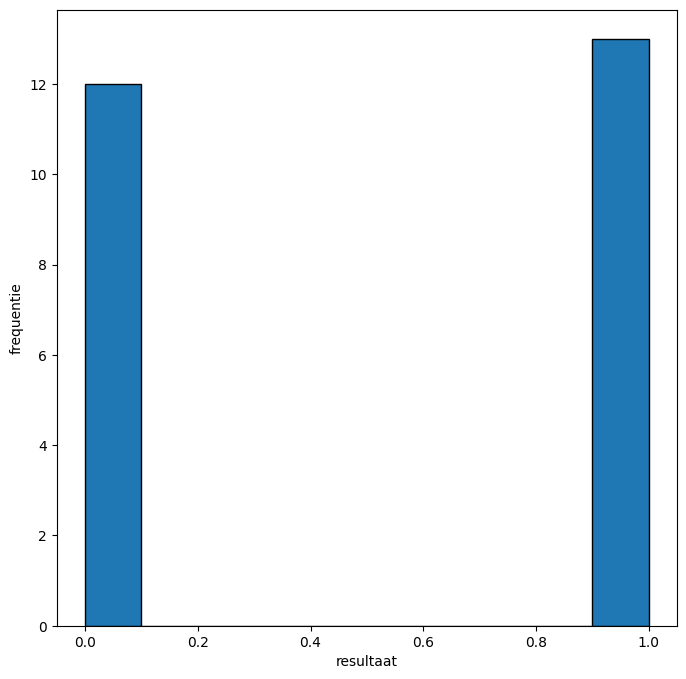

In [31]:
fig, ax = plt.subplots(figsize=(8,8))
df.resultaat.plot(kind="hist", ax=ax, edgecolor='black')
ax.set_xlabel('resultaat')
ax.set_ylabel('frequentie')
plt.show()

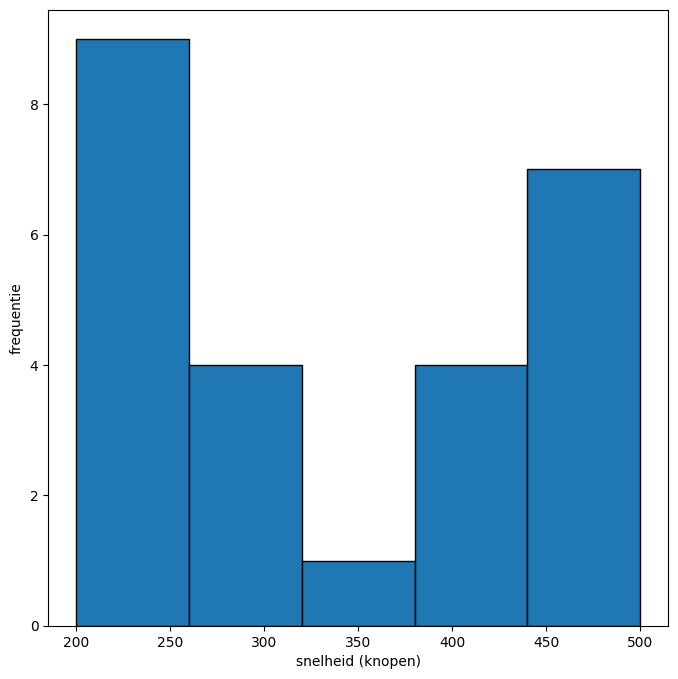

In [47]:
fig, ax = plt.subplots(figsize=(8,8))
df.doel.plot(kind="hist", ax=ax, edgecolor='k', bins=5)
ax.set_ylabel('frequentie')
ax.set_xlabel('snelheid (knopen)')
plt.show()


opvallend is dat veel lage snelheden (200-250 knopen) en veel hoge snelheden (450-500 knopen) getest zijn, maar weining middensnelheden getest zijn (325-375 knopen).


# hoeveel doelen zijn geraakt bij een snelheid van <350 knopen

In [33]:
df.query('doel <350').resultaat.value_counts()

1    12
0     2
Name: resultaat, dtype: int64

- 12 raak
- 2 mis

Dus ook bij lage snelheden wordt het doel vaak geraakt.


# Hoeveel doelen zijn geraakt bij snelheden van =>350 knopen

In [34]:
df.query('doel >= 350').resultaat.value_counts()

0    10
1     1
Name: resultaat, dtype: int64

- 10 mis
- 1 raak
Doel vaak gemist bij hoge snelheden

Het lijkt er dus op dat er een dropoff is bij 350 knopen (misschien is er daarom wel bij deze snelheid niet getest?)

# Welke snelheid had het doel wanneer er gemist werd bij snelheden < 350 knopen?



In [35]:
df.query('resultaat == 0 and doel < 350')

,doel,resultaat
5,270,0
18,230,0


Doel werd gemist bij snelheden van 
- 270
- 230

# Welke snelheden had het doel wanneer het geraakt word bij snelhden > 350 knopen?

In [36]:
df.query('resultaat == 1 and doel >= 350')

,doel,resultaat
17,470,1


Snelheid:
- 470

# Zijn er snelheden die vaker gemeten zijn?

In [37]:
df.doel.value_counts() ==2

490     True
210     True
200     True
470     True
220     True
400    False
280    False
250    False
460    False
430    False
230    False
300    False
240    False
330    False
420    False
310    False
480    False
270    False
500    False
390    False
Name: doel, dtype: bool

Er lijkt inconsistent meermaals gemeten te zijn. Het lijkt daarom een unbalanced analyse.

- Is de snelheid van het doel instelbaar of is dit puur willekeurig?
    - Lijkt erop van wel, aangezien aan de veiligheidsvoorschriften moet worden voldaan en omdat tijdens de metingen de snelheden mooi in stappen van 10 knopen zijn.

# Wat waren de resultaten bij de dubbel gemeten?

In [38]:
df.doel.value_counts()==2

dups = [490, 210, 200, 470, 220]
dups.sort()

In [39]:
for i in dups:
    print(df.query('doel == %i' %i))

    doel  resultaat
6    200          1
23   200          1
    doel  resultaat
3    210          1
15   210          1
    doel  resultaat
1    220          1
21   220          1
    doel  resultaat
7    470          0
17   470          1
    doel  resultaat
2    490          0
11   490          0


De enige met een gemixt resultaat is 470 knopen. De rest is "consistent".

- Aangezien bij snelheden van >350 knopen het doel meestal gemist wordt, lijkt de hit bij 470 knopen een toevalstreffer.

# Plot snelheid vs resultaten

<Axes: xlabel='doel', ylabel='resultaat'>

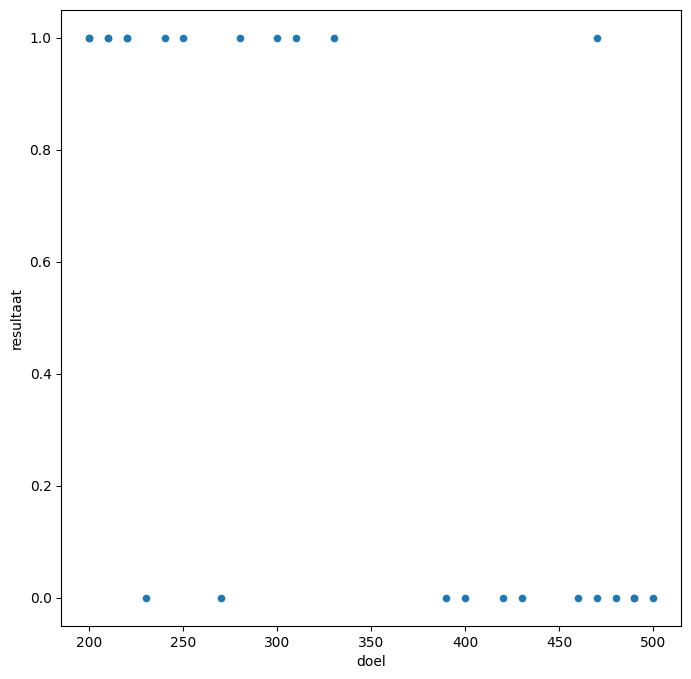

In [40]:
fig, ax = plt.subplots(figsize=(8,8))
df.plot(kind = 'scatter', x='doel', y='resultaat', ax=ax)

# Aantal keren geraakt per snelheid

(200.0, 500.0)

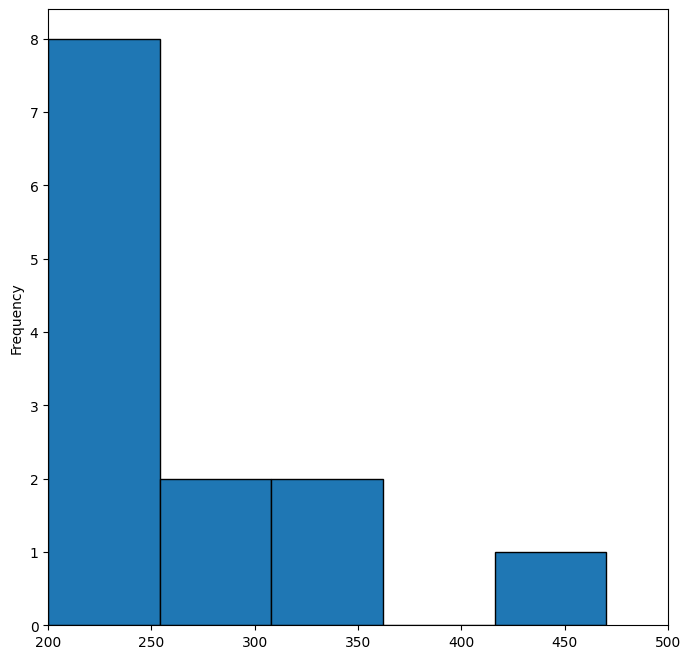

In [41]:
fig, ax = plt.subplots(figsize=(8,8))
df.query('resultaat == 1').doel.plot(kind='hist', ax=ax, bins=5, edgecolor='k')
ax.set_xlim([200, 500])

Zoals vooraf voorspeld, is te zien dat bij snelheden boven de 350 knopen het doel bijna niet meer geraakt wordt.

# Regressie

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [43]:
X = np.array(df.doel.values)
y = np.array(df.resultaat.values)
X = X.reshape(-1,1)

In [44]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [45]:
speed = np.arange(200, 500, 1)
speed = speed.reshape(-1,1)
predictions = lr.predict_proba(speed)

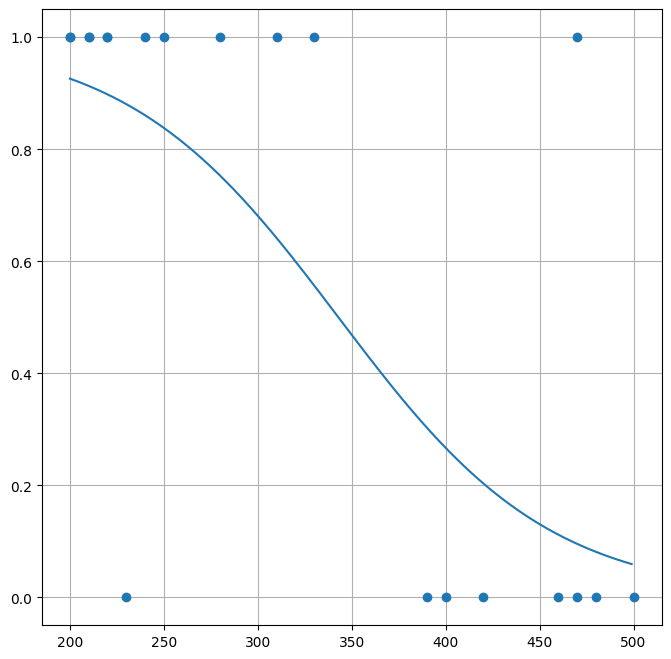

In [46]:
fig, ax = plt.subplots(figsize=(8,8))
ax.grid(True)

ax.scatter(train_X, train_y, zorder=3)
ax.plot(speed, predictions[:,1])

plt.show()